# import data

In [1]:
import pandas as pd

df = pd.read_parquet('data/vn-celeb-data.parquet')
df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ca sĩ Akira Phan


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   8557 non-null   object
 1   label   8557 non-null   object
dtypes: object(2)
memory usage: 133.8+ KB


In [6]:
import os
from PIL import Image
import io

def save_images_from_df(df, base_dir='data/images'):
    os.makedirs(base_dir, exist_ok=True)
    for idx, row in df.iterrows():
        label_dir = os.path.join(base_dir, row['label'])
        os.makedirs(label_dir, exist_ok=True)
        image_bytes = row['image']['bytes']
        image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
        image_path = os.path.join(label_dir, f'{idx}.jpg')
        image.save(image_path)

# Example usage:
save_images_from_df(df)

In [31]:
# Modified code to debug and fix the image format issue
import face_recognition
import numpy as np
from PIL import Image

# Load image with PIL
img_path = r"D:\FPTU\Term7\DAT301m\project\data\images\diễn viên Vương Đại Lục\7874.jpg"
pil_image = Image.open(img_path).convert('RGB')  # Explicitly convert to RGB

# Convert to numpy array
image_array = np.array(pil_image)

# Debug information
print(f"Image shape: {image_array.shape}")
print(f"Image dtype: {image_array.dtype}")
print(f"Image min/max values: {image_array.min()}/{image_array.max()}")

# Try with face_recognition's own loader to compare
try:
    fr_image = face_recognition.load_image_file(img_path)
    print(f"face_recognition loader shape: {fr_image.shape}")
    print(f"face_recognition loader dtype: {fr_image.dtype}")
    # If this worked, use fr_image instead
    face_locations = face_recognition.face_locations(fr_image)
    print(f"Found {len(face_locations)} faces")
except Exception as e:
    print(f"Error with face_recognition loader: {e}")
    
    # Try a different approach - create a new image from the array
    try:
        # Create a new image from the array to ensure it's in the right format
        temp_img = Image.fromarray(image_array)
        # Save and reload (sometimes fixes format issues)
        temp_path = "temp_image.jpg"
        temp_img.save(temp_path)
        # Use face_recognition's loader
        fr_image = face_recognition.load_image_file(temp_path)
        face_locations = face_recognition.face_locations(fr_image)
        print(f"Found {len(face_locations)} faces using the temp file approach")
    except Exception as e2:
        print(f"Error with temp file approach: {e2}")

Image shape: (160, 160, 3)
Image dtype: uint8
Image min/max values: 0/232
face_recognition loader shape: (160, 160, 3)
face_recognition loader dtype: uint8
Error with face_recognition loader: Unsupported image type, must be 8bit gray or RGB image.
Error with temp file approach: Unsupported image type, must be 8bit gray or RGB image.


In [27]:
# Image.open('data/images/ca sĩ Don Nguyễn/589.jpg').show()
import face_recognition
import numpy as np

img_dir = r'data\images\ca sĩ Khánh Phương\1567.jpg'
# image = face_recognition.load_image_file(img_dir)
image = Image.open('data/images/ca sĩ Don Nguyễn/589.jpg')
face_locations = face_recognition.face_locations(np.array(image))


RuntimeError: Unsupported image type, must be 8bit gray or RGB image.

# khám phá xem data có ai

In [107]:
import unicodedata

def normalize_text(text):
    return unicodedata.normalize('NFC', text).lower()

def find_name_from_labels(search_term):
    """
    Returns a list of unique labels containing the search_term (case-insensitive, Unicode-normalized).
    """
    norm_search = normalize_text(search_term)
    names = df['label'].unique()
    return [label for label in names if norm_search in normalize_text(label)]

# Example usage:
search_term = 'icm'
matching_labels = find_name_from_labels(search_term)
print(f"Labels containing '{search_term}': {matching_labels}")

Labels containing 'icm': ['ca sĩ K Icm']


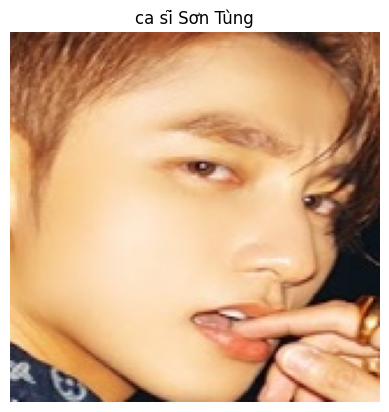

In [111]:

import io
from matplotlib import pyplot as plt

def show_bytes_image_with_label(image_bytes_dict, label):
    image_bytes = image_bytes_dict['bytes']
    image = Image.open(io.BytesIO(image_bytes))
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()

# row = df.iloc[525]
row = df.loc[df['label'] == 'ca sĩ Sơn Tùng'].iloc[0]
show_bytes_image_with_label(row['image'], row['label'])


True